# Hmwk #1

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Represent the following table using a data structure of your choice

In [2]:
df = pd.read_csv("weather.csv", header=0, index_col=0)
df

,outlook,temperature,humidity,windy,play
Day,,,,,
1,sunny,85,85,False,no
2,sunny,80,90,True,no
3,overcast,83,86,False,yes
4,rainy,70,96,False,yes
5,rainy,68,80,False,yes
6,rainy,65,70,True,no
7,overcast,64,65,True,yes
8,sunny,72,95,False,no
9,sunny,69,70,False,yes


### Calculate the mean temperature and mean humidity

In [3]:
mean_temp = df["temperature"].mean()
mean_temp

73.571428571428569

In [4]:
mean_humidity = df["humidity"].mean()
mean_humidity

81.642857142857139

### Print outlook and play for those days where the temperature is greater than the average temperature

In [5]:
temp_selector = df['temperature'] > mean_temp
df[temp_selector][["outlook", "play"]]

,outlook,play
Day,,
1,sunny,no
2,sunny,no
3,overcast,yes
10,rainy,yes
11,sunny,yes
13,overcast,yes


### Print outlook and play for those days where the humidity is greater than the average humidity

In [6]:
humidity_selector = df['humidity'] > mean_humidity
df[humidity_selector][["outlook", "play"]]

,outlook,play
Day,,
1,sunny,no
2,sunny,no
3,overcast,yes
4,rainy,yes
8,sunny,no
12,overcast,yes
14,rainy,no


### Convert the temperature to Celsius and add a new column therefore in the table.

In [7]:
df["temp_C"] = ( df["temperature"] - 32 ) * (5/9.0)
df

,outlook,temperature,humidity,windy,play,temp_C
Day,,,,,,
1,sunny,85,85,False,no,29.444444
2,sunny,80,90,True,no,26.666667
3,overcast,83,86,False,yes,28.333333
4,rainy,70,96,False,yes,21.111111
5,rainy,68,80,False,yes,20.000000
6,rainy,65,70,True,no,18.333333
7,overcast,64,65,True,yes,17.777778
8,sunny,72,95,False,no,22.222222
9,sunny,69,70,False,yes,20.555556


### #1 

How often do you play tennis independent of the other attributes?

From the out put we can see that we played tennis `9` days w/ a probibilty of `9/14`

In [8]:
play_selector = df["play"]=="yes"

play_days = df[play_selector]
len(play_days)

9

### #2

How often do you play tennis when it is "sunny"?

From the output we can see that we played when it was sunny on `2` days or `2/14`

In [9]:
sunny_selector = df["outlook"]=="sunny"

sunny_play_days = df[sunny_selector & play_selector]
len(sunny_play_days)

2

### #3

*Compare the average, minimum and maximum temperature when you play tennis? *

In [10]:
print play_days["temperature"].mean()
print play_days["temperature"].min()
print play_days["temperature"].max()

73.0
64
83


### #4

*Compare the average, minimum and maximum humidity when you play tennis?*

In [11]:
print play_days["humidity"].mean()
print play_days["humidity"].min()
print play_days["humidity"].max()

79.1111111111
65
96


### #5

*Plot the an scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis.*

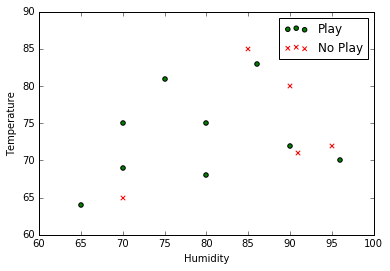

In [20]:
pyplot.ylabel('Temperature')
pyplot.xlabel("Humidity")
pyplot.scatter(x=play_days["humidity"], y=play_days["temperature"], c='green')
no_play_days = df[df["play"]=="no"]
pyplot.scatter(x=no_play_days["humidity"], y=no_play_days["temperature"], c='red', marker="x")
pyplot.legend(['Play', "No Play"])

The only inferences I can make from the scatter plot above, is that you always play when the humidity is between 70 and 85. Temperature seems to play no part of the decision process when you go out to play as from teh scatter plot the plays and no play poionts are evenly distributed across the y axis (Temperature).

## #2

We have a set of 8 files where the first 7 and the last 2 have a different format. First I removed the header information from the files and removed any superfolous line breaks, I then read them into pandas in two respective groups. I then had to normalize the dates of teh second dataset to match the dates of the first. Also I had to normalize the values of the first dataset b/c they were in units of 1000, so I made it in units of 1.

### Cleaning & Normalization

In [37]:
#these are in units of thousands, need to scale
df1 = pd.read_fwf("processed/st0009ts.txt", header=0, index_col=0, thousands=",").transpose()
df2 = pd.read_fwf("processed/st1019ts.txt", header=0, index_col=0, thousands=",").transpose()
df3 = pd.read_fwf("processed/st2029ts.txt", header=0, index_col=0, thousands=",").transpose()
df4 = pd.read_fwf("processed/st3039ts.txt", header=0, index_col=0, thousands=",").transpose()
df5 = pd.read_fwf("processed/st4049ts.txt", header=0, index_col=0, thousands=",").transpose()
df6 = pd.read_fwf("processed/st5060ts.txt", header=0, index_col=0, thousands=",").transpose()
df7 = pd.read_fwf("processed/st6070ts.txt", header=0, index_col=0, thousands=",").transpose()
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

#scale up to unit of 1
df = df.apply(lambda x: x*1000)

#for some reason, this dataset format uses '.'s in U.S. but doesn't for anything else. We'll normalize it here
df[["U.S."]]
df.rename(columns={'U.S.': 'US'}, inplace=True)

In [38]:
#the file format changes here
transform = lambda x: "19"+x[2:4]
df_9 = pd.read_fwf("processed/st7080ts.txt", header=0, index_col=0, thousands=",").transpose()
df_9.index = df_9.index.map(transform)
df_10 = pd.read_fwf("processed/st8090ts.txt", header=0, index_col=0, thousands=",").transpose()
df_10.index = df_10.index.map(transform)
df_10

df_2 = pd.concat([df_9, df_10])

### Merging

In [39]:
# now merge the two together to get the compleete mergered df
df = pd.concat([df, df_2])
df=df.sort_index() #sort

### Plot CA vs AK

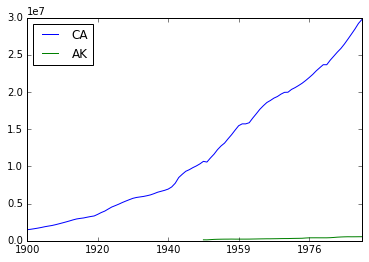

In [40]:
df[["CA", "AK"]].plot()

### New England vs Southwest

In order to plot these values I have to do some feature engineering to create columns for the respective regions that are not in the original dataset. 

For New England I used: CT, ME, MA, NH, RI, VT

For the Southwest, I used: AZ, CA, CO, NV, NM, TX, UT

#### Feature Engineering

In [41]:
df["New England"] = df[["CT", "ME", "MA", "NH", "RI", "VT"]].sum(axis=1)
df["Southwest"] = df[["AZ", "CA", "CO", "NV", "NM", "TX", "UT"]].sum(axis=1) 

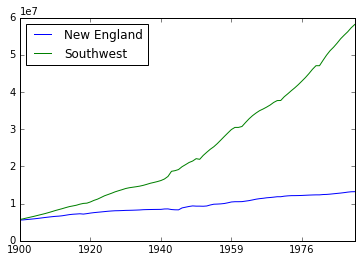

In [42]:
df[["New England", "Southwest"]].plot()

### Greatest Change in Population

We can quantify population growth in direct terms or relativly using percentages:

#### Magnitude Delta

We don't have measurements for Alaska  until 1950, so if we compare growth from 1950 in terms of pure magnitude, the top states are shown below:

In [43]:
#remove a few composite columns:
df.drop('US', axis=1, inplace=True)
df.drop('Southwest', axis=1, inplace=True)
df.drop('New England', axis=1, inplace=True)

In [44]:
delta = {}
rel_delta={}
for state in df.columns:
    delta[state]=df[state].iloc[-1] - df[state].iloc[50]
    rel_delta[state] = (df[state].iloc[-1] - df[state].iloc[50]) / df[state].iloc[50]*1. * 100
    
ddf=pd.DataFrame(delta, index=["delta"]).transpose()
ddf = ddf.sort(["delta"], ascending=False)
ddf.head()

,delta
CA,19083021
FL,10127926
TX,9210510
NY,3125455
GA,3020216


As you can see from teh table above, CA had the largest growth in terms of raw numbers for the time period. However, we can gain additional insites by looking at percentatge growth.

#### Relative Growth

We can also measure growth as a percenagte difference: As you can see Nevada had the largest percent growth from 1950 to 1900

In [56]:
ddp=pd.DataFrame(rel_delta, index=["% change"]).transpose()
ddp = ddp.sort(["% change"], ascending=False)
ddp.head()

,% change
NV,600.000000
AK,307.439259
FL,300.000000
AZ,300.000000
HI,122.535944


Some states had no net growth and some had negative growth:

In [61]:
ddp.tail(n=10)

,% change
AL,0
MT,0
WY,0
DC,-100
WV,-100
Midwest,NaN
North Central,NaN
Northeast,NaN
South,NaN
West,NaN


## 3

## 4

We will use a Decision Tree to build a model that will allow us to classify wines into one of three categories.

In [87]:
from sklearn import tree
import numpy as np

In [81]:
wine = np.loadtxt("wine.data", delimiter=',')
#Get the targets (first column of file)
Y = wine[:, 0]
#Remove targets from input data
X = wine[:, 1:]

### Test/Train Split

Split the dat set into 75% for training and 25% for testing

In [102]:
#lets split into a test and training set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=9)

### Train Model

In [110]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [111]:
clf.score(X_test, Y_test)

0.9555555555555556

### Evaluation

Evaluate based on confusion matrix how well the model performed on training vs. testing.

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ["1", "2", "3"], rotation=45)
    plt.yticks(tick_marks, ["1", "2", "3"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  0  0]
 [ 0 13  0]
 [ 0  2 10]]


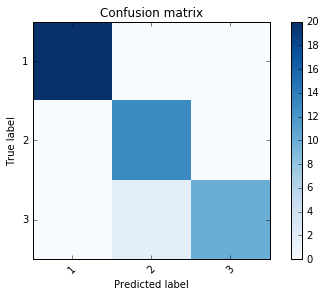

In [113]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
y_true = Y_test
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

As you can see from the confusion matrix, inputs of Class 1 & 2 were perfectly classified. There were only 2 mistakes on Class 3.

## 5

In [165]:
odf = pd.read_csv("hmwk_1_data/AHW_1.csv")
odf.head()

,Total,Sport,Age,Height,Weight,Sex
0,0,Judo,23,170,60,M
1,0,Athletics,33,193,125,M
2,0,Athletics,30,187,76,M
3,0,Boxing,24,NaN,NaN,M
4,0,Athletics,26,178,85,F


### What are the statistical distributions of variables using no class?

count    10384.000000
mean        26.068856
std          5.440561
min         13.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         71.000000
Name: Age, dtype: float64

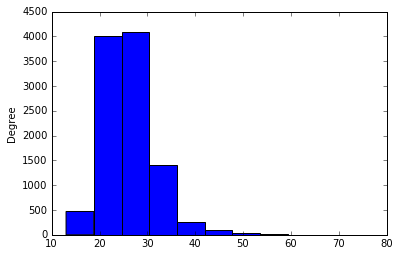

In [174]:
odf["Age"].plot(kind="hist")
odf["Age"].describe()

count    9104.000000
mean       72.852812
std        16.067462
min        36.000000
25%        61.000000
50%        70.000000
75%        81.000000
max       218.000000
Name: Weight, dtype: float64

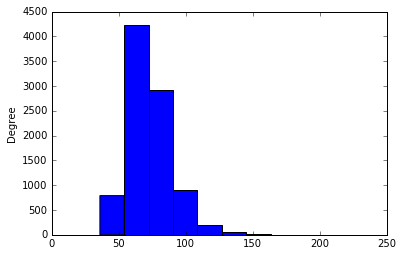

In [175]:
odf["Weight"].plot(kind="hist")
odf["Weight"].describe()

count    9823.000000
mean      176.907869
std        11.295433
min       132.000000
25%       169.000000
50%       177.000000
75%       185.000000
max       221.000000
Name: Height, dtype: float64

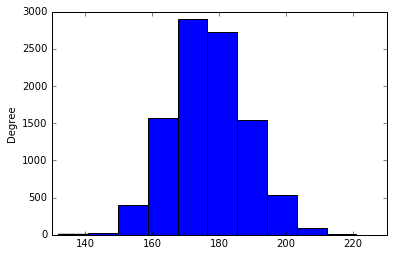

In [176]:
odf["Height"].plot(kind="hist")
odf["Height"].describe()

### How much missing data is there?

In [164]:
odf.isnull().sum()

Total        0
Sport        0
Age          0
Height     561
Weight    1280
Sex          0
dtype: int64

### How do distributions differ by each gender?

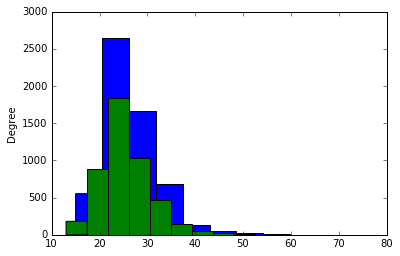

In [167]:
male = odf["Sex"]=="M"
female = odf["Sex"]=="F"
odf[male]["Age"].plot(kind="hist")
odf[female]["Age"].plot(kind="hist")

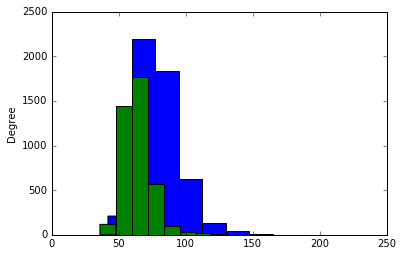

In [170]:
odf[male]["Weight"].plot(kind="hist")
odf[female]["Weight"].plot(kind="hist")

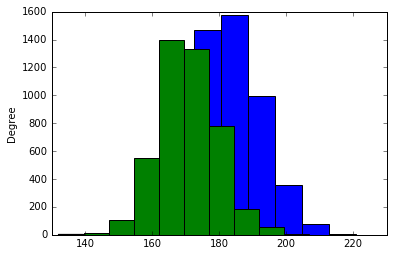

In [172]:
odf[male]["Height"].plot(kind="hist")
odf[female]["Height"].plot(kind="hist")

### Describe summary statistics for each attribute.

In [177]:
odf.describe()

,Total,Age,Height,Weight
count,10384.000000,10384.000000,9823.000000,9104.000000
mean,0.052196,26.068856,176.907869,72.852812
std,0.250149,5.440561,11.295433,16.067462
min,0.000000,13.000000,132.000000,36.000000
25%,0.000000,22.000000,169.000000,61.000000
50%,0.000000,25.000000,177.000000,70.000000
75%,0.000000,29.000000,185.000000,81.000000
max,5.000000,71.000000,221.000000,218.000000


### Visualize potential difference via the scatter plots. 

#### Are there any ‘high’ correlations between variables?

We can see a correlation between height and weight

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f436f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fde2510>]], dtype=object)

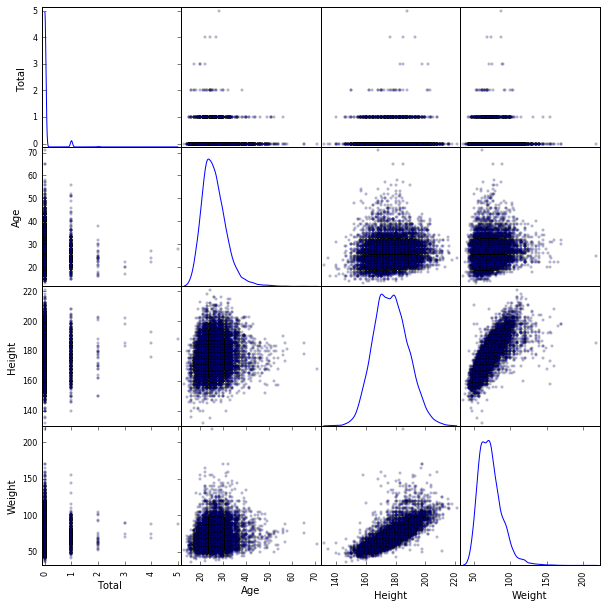

In [229]:
from pandas.tools.plotting import scatter_matrix
pd.scatter_matrix(odf, alpha=0.2, figsize=(10, 10), diagonal='kde')

### Create a new variable for the weight in lbs

Creating a new column for pounds obviously does not create any new correlations b/c it simply a linear combination w/ the kg weight.

In [232]:
odf["lbs"] = odf["Weight"] * 2.20462
odf.head()

,Total,Sport,Age,Height,Weight,Sex,lbs
0,0,Judo,23,170,60,M,132.27720
1,0,Athletics,33,193,125,M,275.57750
2,0,Athletics,30,187,76,M,167.55112
3,0,Boxing,24,NaN,NaN,M,NaN
4,0,Athletics,26,178,85,F,187.39270


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121676b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12226a0d0>]], dtype=object)

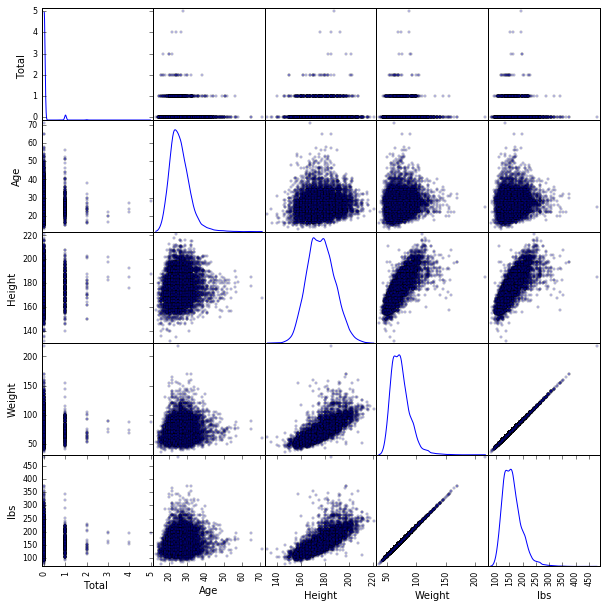

In [234]:
pd.scatter_matrix(odf, alpha=0.2, figsize=(10, 10), diagonal='kde')

### Add new variable w​eight + height.

In [238]:
odf["w+h"] = odf["Weight"] + odf["Height"]
odf.drop('lbs', axis=1, inplace=True)
odf.head()

ValueError: labels ['lbs'] not contained in axis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122930490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1236cb990>]], dtype=object)

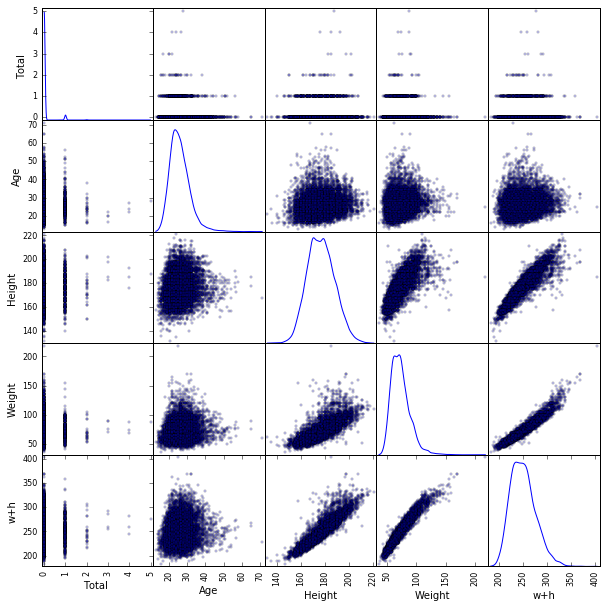

In [239]:
pd.scatter_matrix(odf, alpha=0.2, figsize=(10, 10), diagonal='kde')

### BMI

There appears to be obese males and females in the dataset

In [247]:
odf["BMI"] = odf["Weight"] / ((odf["Height"]*0.01)**2)
odf.head()

,Total,Sport,Age,Height,Weight,Sex,w+h,BMI
0,0,Judo,23,170,60,M,230,20.761246
1,0,Athletics,33,193,125,M,318,33.557948
2,0,Athletics,30,187,76,M,263,21.733535
3,0,Boxing,24,NaN,NaN,M,NaN,NaN
4,0,Athletics,26,178,85,F,263,26.827421


count    5017.000000
mean       23.961976
std         3.387829
min        11.455268
25%        21.913806
50%        23.510204
75%        25.237205
max        63.696129
Name: BMI, dtype: float64

count    4021.000000
mean       21.637999
std         2.820028
min        13.774105
25%        20.047446
50%        21.296296
75%        22.758307
max        62.089409
Name: BMI, dtype: float64


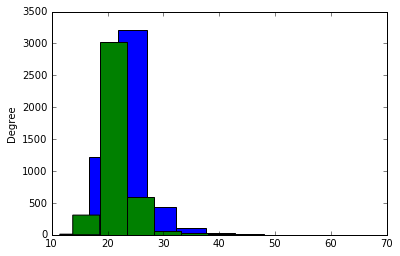

In [269]:
odf[male]["BMI"].plot(kind="hist")
odf[female]["BMI"].plot(kind="hist")
print odf[male]["BMI"].describe()
print
print odf[female]["BMI"].describe()

### Split Data By Sport

In [291]:
sports = list(set(odf["Sport"]))
sports
# choose 3 random sports
sports

['Taekwondo',
 'Triathlon',
 'Basketball',
 'Cycling - Mountain Bike, Cycling - Track',
 'Fencing',
 'Boxing',
 'Cycling - Road',
 'Beach Volleyball',
 'Cycling - Road, Cycling - Track',
 'Hockey',
 'Water Polo',
 'Equestrian',
 'Cycling - Mountain Bike, Cycling - Road',
 'Cycling - Track',
 'Modern Pentathlon',
 'Football',
 'Synchronised Swimming',
 'Weightlifting',
 'Gymnastics - Rhythmic',
 'Cycling - Mountain Bike, Cycling - Road, Cycling - Track',
 'Archery',
 'Tennis',
 'Judo',
 'Sailing',
 'Rowing',
 'Table Tennis',
 'Volleyball',
 'Athletics, Triathlon',
 'Trampoline',
 'Athletics',
 'Swimming',
 'Canoe Slalom',
 'Cycling - Mountain Bike',
 'Wrestling',
 'Gymnastics - Artistic',
 'Badminton',
 'Cycling - BMX',
 'Cycling - BMX, Cycling - Track',
 'Handball',
 'Diving',
 'Canoe Sprint',
 'Shooting']

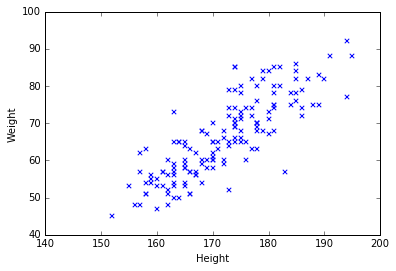

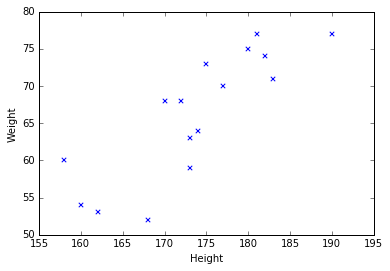

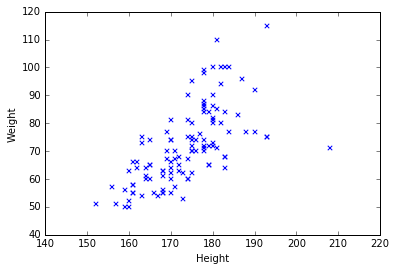

In [290]:
import random
random_sports = random.sample(sports, 3)

for sport in random_sports:
    sport_selector = odf["Sport"] == sport
    odf[sport_selector].plot(kind="scatter", x="Height", y="Weight", marker='x')